# Crypto Currencies Visualization with Seaborn
Outline
* visualizing correlation with heatmap 
* exploring relationship with pairplot 

In [56]:
import numpy as np
import pandas as pd

In [20]:
import seaborn as sns

%matplotlib inline 
#tip 1: always type this at the beginning of the notebook,show visualiation automatically 


In [21]:
#Use for loop to merge 5 excel sheets into one dataframe 
xls = pd.ExcelFile('crypto.xlsx') #basically the same as pd.read_excel 
currencies = xls.sheet_names #save the sheet names in currencies, to create a list to iterate through 
listings =[] 

for currency in currencies: 
    listing = pd.read_excel(xls, sheetname = currency)
    listing['Currency'] = currency #add reference columns, make the currency value propagates to all the row(broadcasting) 
    listings.append(listing)
    combined_listing1 = pd.concat(listings)
#by default in concat function, axis = 0 -> concat vertically 
#axis = 1 -> concat horizontally 



In [22]:
xls.sheet_names

['BTC-USD', 'XRP-USD', 'ETH-USD', 'NEO-USD', 'XLM-USD']

In [27]:
#combined_listing1 #merged all excel sheets vertically 

In [30]:
cp1 = combined_listing1.pivot_table(index = 'Date', columns = 'Currency', values = 'Close')
cp1.head()

Currency,BTC-USD,ETH-USD,NEO-USD,XLM-USD,XRP-USD
Date,,,,,
2013-01-27,17.820000,NaN,NaN,NaN,NaN
2013-01-28,18.719999,NaN,NaN,NaN,NaN
2013-01-29,19.530001,NaN,NaN,NaN,NaN
2013-01-30,19.700001,NaN,NaN,NaN,NaN
2013-01-31,20.410000,NaN,NaN,NaN,NaN


# Exploring Correlation between Crypto Currencies 

In [13]:
cp1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1823 entries, 2013-01-27 to 2018-01-28
Data columns (total 5 columns):
BTC-USD    1822 non-null float64
ETH-USD    903 non-null float64
NEO-USD    32 non-null float64
XLM-USD    375 non-null float64
XRP-USD    1100 non-null float64
dtypes: float64(5)
memory usage: 85.5 KB


In [14]:
cp2 = cp1.drop(['NEO-USD'],axis = 1)
cp2.head()

Currency,BTC-USD,ETH-USD,XLM-USD,XRP-USD
Date,,,,
2013-01-27,17.820000,NaN,NaN,NaN
2013-01-28,18.719999,NaN,NaN,NaN
2013-01-29,19.530001,NaN,NaN,NaN
2013-01-30,19.700001,NaN,NaN,NaN
2013-01-31,20.410000,NaN,NaN,NaN


In [15]:
cp_sliced = cp2.iloc[(1822-365):-1]
cp_sliced.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-27 to 2018-01-27
Data columns (total 4 columns):
BTC-USD    365 non-null float64
ETH-USD    365 non-null float64
XLM-USD    365 non-null float64
XRP-USD    365 non-null float64
dtypes: float64(4)
memory usage: 14.3 KB


## HEATMAP
* colors in the values based on the color scale 
* how values are relative to each other
* for heatmap to work, the data must be in matrix data format 
* matrix format – where index and column name show  a value that makes sense, in other words, the row and column must be an actual variable 


In [52]:
cp_corr =cp_sliced.corr()
cp_corr

Currency,BTC-USD,ETH-USD,XLM-USD,XRP-USD
Currency,,,,
BTC-USD,1.000000,0.864311,0.741496,0.738999
ETH-USD,0.864311,1.000000,0.892519,0.876545
XLM-USD,0.741496,0.892519,1.000000,0.952502
XRP-USD,0.738999,0.876545,0.952502,1.000000


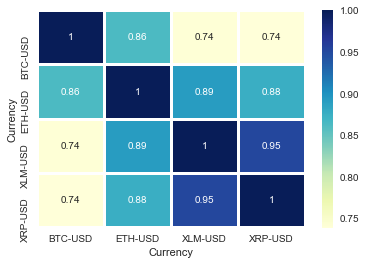

In [53]:
sns.heatmap(cp_corr, annot =True, cmap= 'YlGnBu', linecolor = 'white', linewidth = 2)
#YzlGnBu 
#Magma 
#coolwarm 

# PAIRPLOT
* Useful to explore relationships between variables
* plot pairwise relationship for numerical columns
* do joint plot for all possible combination 


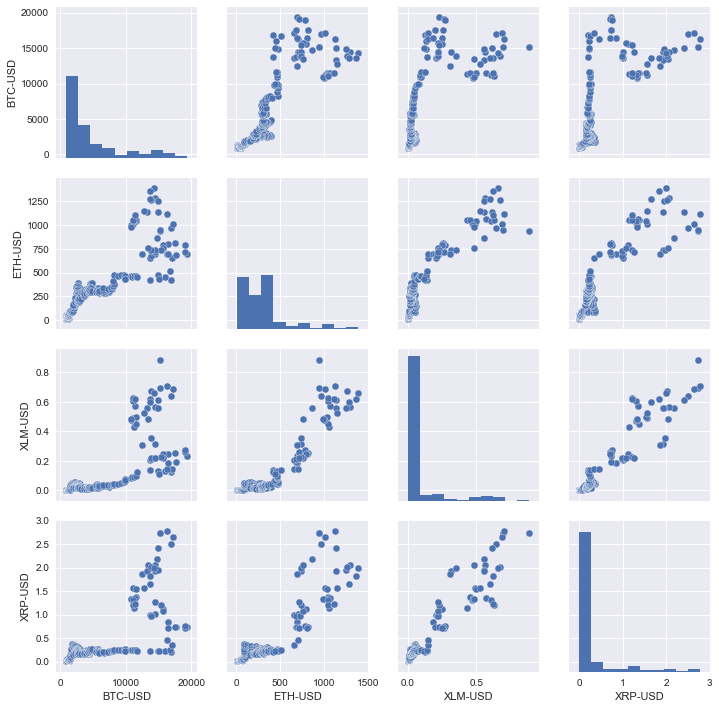

In [55]:
sns.pairplot(cp_sliced)
#charts shown diagonally: histograms 
#the rest are scatter plots 